In [81]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 
from scipy.stats import linregress
import gmaps

#Import API key
from config import g_key


In [82]:
#Save from CSVs
pk_go_csv = pd.read_csv("Resources/pkmn-go.csv")
poke_spawns = pd.read_csv("Resources/pokemon-spawns.csv")

merged_csv = pd.merge(pk_go_csv, poke_spawns, on="name")
merged_csv.head(None)
#Drop Unncessary Columns and Exact Duplicates
cleaned_csv = merged_csv.drop_duplicates()
cleaned_csv = cleaned_csv[['name', 'stamina', 'atk', 'def', 'capture_rate', 'spawn_chance', 'primary', 'cp', 'lat', 'lng']]
#Counts of Pokemon by Type
print(cleaned_csv.primary.value_counts())
cleaned_csv.reset_index(drop=True).head(None)




Normal      112916
Poison       47838
Bug          39544
Water        29628
Ground       10853
Grass         9353
Fire          8067
Fighting      6586
Rock          5137
Electric      3900
Fairy         3406
Psychic       2278
Ghost          830
Dragon         697
Ice            115
Name: primary, dtype: int64


,name,stamina,atk,def,capture_rate,spawn_chance,primary,cp,lat,lng
0,Bulbasaur,90,126,126,0.16,69.0,Grass,1079,37.352721,-121.965752
1,Bulbasaur,90,126,126,0.16,69.0,Grass,1079,37.386986,-122.173674
2,Bulbasaur,90,126,126,0.16,69.0,Grass,1079,37.562587,-122.033978
3,Bulbasaur,90,126,126,0.16,69.0,Grass,1079,37.577153,-122.082546
4,Bulbasaur,90,126,126,0.16,69.0,Grass,1079,37.717652,-122.453226
...,...,...,...,...,...,...,...,...,...,...
281143,Dragonair,122,170,152,0.08,2.0,Dragon,1760,37.860065,-122.485598
281144,Dragonair,122,170,152,0.08,2.0,Dragon,1760,37.860065,-122.485598
281145,Dragonair,122,170,152,0.08,2.0,Dragon,1760,37.806800,-122.423853
281146,Dragonair,122,170,152,0.08,2.0,Dragon,1760,37.806800,-122.423853


In [153]:
#Breakdown of Counts by Species and Primary Type
#poketype_df = cleaned_csv.groupby('primary')
#poketype_df = pd.DataFrame(poketype['name'].value_counts())

poketype_df.head(50)

name
primary  name             
Bug      Weedle      12546
         Paras       10745
         Caterpie     6785
         Venonat      5501
         Pinsir       1961
         Kakuna        703
         Metapod       410
         Parasect      285
         Scyther       211
         Venomoth      203
         Beedrill      148
         Butterfree     46
Dragon   Dratini       678
         Dragonair      19
Electric Pikachu      1498
         Magnemite    1113
         Voltorb      1060
         Electabuzz     94
         Magneton       41
         Jolteon        40
         Electrode      37
         Raichu         17
Fairy    Clefairy     3339
         Clefable       67
Fighting Mankey       4641
         Machop       1631
         Primeape      104
         Hitmonchan     74
         Hitmonlee      68
         Machoke        63
         Machamp         5
Fire     Growlithe    4725
         Ponyta       1611
         Vulpix        664
         Charmander    486
         Magmar        420
         Arcanine       63
         Rapidash       31
         Charmeleon     26
         Flareon        19
         Ninetales      12
         Charizard      10
Ghost    Gastly        797
         Haunter        33
Grass    Bellsprout   2446
         Oddish       2375
         Bulbasaur    2144
         Exeggcute    1548
         Tangela       467
         Weepinbell    133

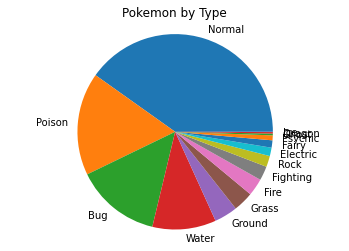

In [137]:
# pie chart of distribution of pokemon types
#take "primary" column, create lists to plot
types = cleaned_csv["primary"].value_counts(dropna=False).keys().tolist()
counts = cleaned_csv["primary"].value_counts(dropna=False).tolist()

plt.pie(counts, labels=types, labeldistance=1.1, )
plt.title("Pokemon by Type")
plt.axis('equal')
plt.savefig("Saved_Figures/pie_type")
plt.show()

### Does attack level have a correlation to capture rate?

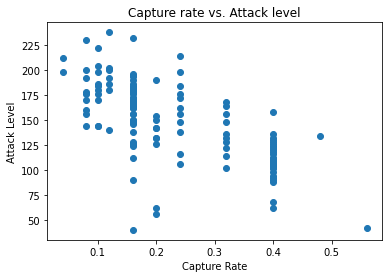

In [65]:
#Capture Rate v Attack Level 
fig, ax = plt.subplots()

ax.scatter(cleaned_csv['capture_rate'], cleaned_csv["atk"])
plt.title('Capture rate vs. Attack level')
plt.xlabel('Capture Rate')
plt.ylabel('Attack Level')
plt.savefig("Saved_Figures/capture_v_attack")
plt.show()

## Linregress for Capture Rate vs Attack Level

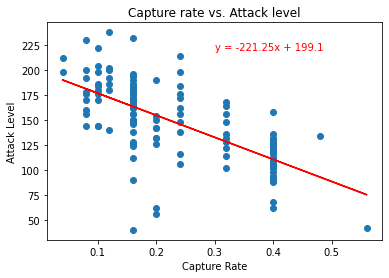

In [13]:
#Capture Rate v Attack Level with linregress line

#lin regress equation
x_data= cleaned_csv['capture_rate']
y_data= cleaned_csv["atk"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["atk"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,220), color='red')
plt.title('Capture rate vs. Attack level')
plt.xlabel('Capture Rate')
plt.ylabel('Attack Level')
plt.savefig("Saved_Figures/cature_v_attack_linreg")
plt.show()

## Does capture rate have a correlation with Stamina levels?

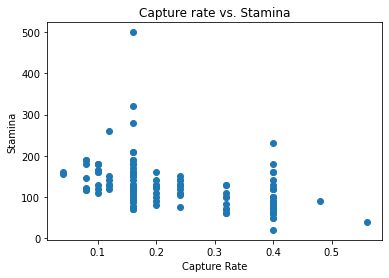

In [15]:
#Capture Rate v Stamina

plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["stamina"])
plt.title('Capture rate vs. Stamina')
plt.xlabel('Capture Rate')
plt.ylabel('Stamina')
plt.savefig("Saved_Figures/capture_v_stamina")
plt.show()

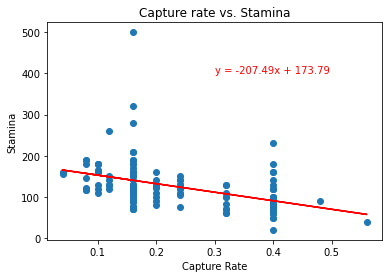

In [17]:
#Capture Rate v Stamina with linregress line

#lin regress equation
x_data2= cleaned_csv['capture_rate']
y_data2= cleaned_csv["stamina"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data2, y_data2)
regress_values = x_data2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(cleaned_csv['capture_rate'], cleaned_csv["stamina"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,400), color='red')
plt.title('Capture rate vs. Stamina')
plt.xlabel('Capture Rate')
plt.ylabel('Stamina')
plt.savefig("Saved_Figures/capture_v_stamina_linreg")
plt.show()

In [120]:
poketype = cleaned_csv.groupby('primary')
avg_spawn_chance = poketype['spawn_chance'].mean()
avg_cp = poketype['cp'].mean()
avg_capture = poketype['capture_rate'].mean()
#spawn_df = spawn_chance.rename_axis('Primary').to_frame('Average Spawn Chance')
#spawn_df.sort_values(by='Average Spawn Chance', ascending = False)
avg_table = pd.DataFrame({
    "Average CP": avg_cp,
    "Average Spawn Chance": avg_spawn_chance,
    "Average Capture Rate": avg_capture,
    
})

print("Summary of Average Capture Related Stats")
avg_table

Summary of Average Capture Related Stats


,Average CP,Average Spawn Chance,Average Capture Rate
primary,,,
Bug,775.204481,379.833365,0.359411
Dragon,1010.989957,29.236729,0.313458
Electric,947.103846,46.232262,0.294892
Fairy,1232.703758,90.213858,0.236853
Fighting,975.860917,77.092287,0.388895
Fire,1387.389116,67.953618,0.248162
Ghost,833.060241,76.065783,0.313639
Grass,1180.466268,86.055763,0.352180
Ground,903.521699,75.094822,0.374971


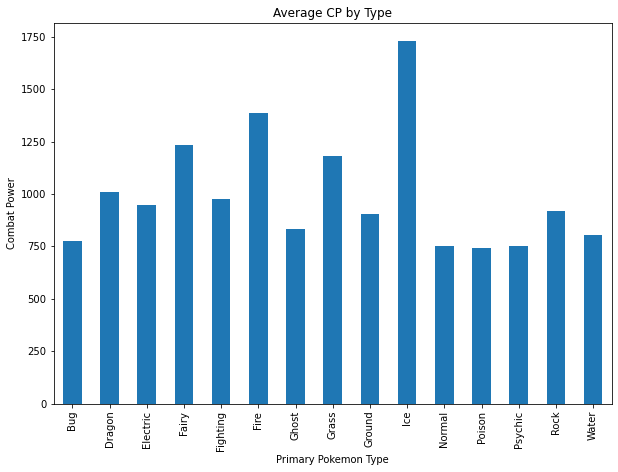

In [116]:
#Bar Graph of Average CP
avg_table['Average CP'].plot(kind='bar', figsize=(10,7))
plt.title("Average CP by Type")
plt.xlabel("Primary Pokemon Type")
plt.ylabel("Combat Power")
plt.show()

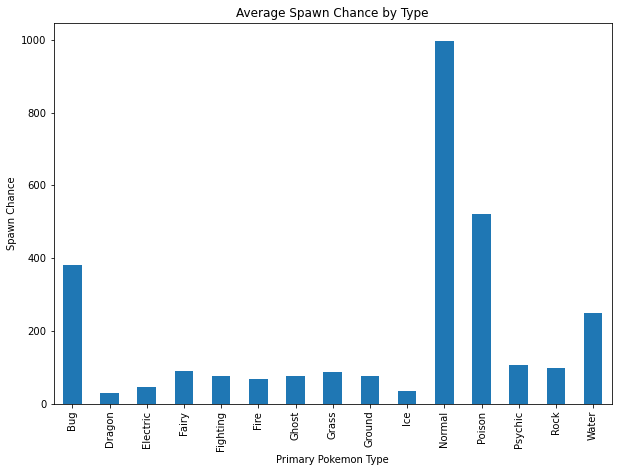

In [115]:
#Bar Graph of Average Spawn Chance
avg_table['Average Spawn Chance'].plot(kind='bar', figsize=(10,7))
plt.title("Average Spawn Chance by Type")
plt.xlabel("Primary Pokemon Type")
plt.ylabel("Spawn Chance")
plt.show()

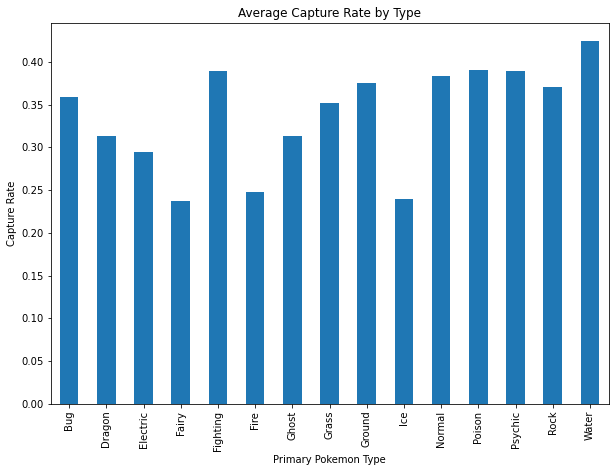

In [114]:
#Bar Graph of Average Capture Rate
avg_table['Average Capture Rate'].plot(kind='bar', figsize=(10,7))
plt.title("Average Capture Rate by Type")
plt.xlabel("Primary Pokemon Type")
plt.ylabel("Capture Rate")
plt.show()


In [154]:
#Access maps with API key
gmaps.configure(api_key=g_key)

#Ask for user input to search map by Pokemon Type for heatmap visualization
query = str(input("Enter Pokemon Type"))
highest_avg_cp = cleaned_csv[cleaned_csv['primary'] == query]
locations = highest_avg_cp[["lat", "lng"]]
cp = highest_avg_cp["cp"].astype(float)
# Using the template add marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>CP</dt><dd>{cp}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
poke_info = [info_box_template.format(**row) for index, row in highest_avg_cp.iterrows()]

#Plot Heatmap
fig = gmaps.figure()
#Add markers
markers = gmaps.marker_layer(locations, info_box_content=poke_info)
fig.add_layer(markers)
#Create Heatlayer
heat_layer = gmaps.heatmap_layer(locations, cp, dissipating=False, point_radius=1)

#Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))